<a href="https://colab.research.google.com/github/jodekpotasu/classification42/blob/main/Projekt_praktyczny_2_poprawki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [445]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from google.colab import files
from bs4 import BeautifulSoup
import requests
import re
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import plotly 
import plotly.graph_objects as go 
from plotly.offline import iplot 
import plotly.express as px
import plotly.figure_factory as ff
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import xlwt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [446]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/df1.csv'
trainingx = pd.read_csv(url)

In [447]:
trainingx

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0


In [448]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/attrition.csv'
trainingy = pd.read_csv(url)

In [449]:
trainingy

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No
...,...,...
4444,7975,Yes
4445,7976,Yes
4446,7977,Yes
4447,7978,Yes


In [450]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/df2.csv'
testx = pd.read_csv(url)

In [451]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/sample_output.csv'
testy = pd.read_csv(url)

In [452]:
data = trainingx.merge(trainingy)

In [453]:
data = data.drop(['EmployeeNumber','EmployeeCount','DailyRate',  'MonthlyRate'  ], axis=1)
data.describe(include='all')

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Attrition
count,4449.000000,4449,4449,4449.000000,4449.000000,4449,4449.000000,4449,4449.000000,4449.000000,4449.000000,4449,4449.000000,4449,4449.000000,4449.000000,4302
unique,NaN,3,3,NaN,NaN,6,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,2
top,NaN,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,Yes
freq,NaN,3147,2916,NaN,NaN,1823,NaN,2681,NaN,NaN,NaN,983,NaN,2074,NaN,NaN,2222
mean,416.187458,NaN,NaN,33339.433356,2.909867,NaN,2.719263,NaN,65.977073,2.739492,2.053495,NaN,2.724882,NaN,6468.496067,2.681726,NaN
std,1566.205147,NaN,NaN,145352.131423,1.025184,NaN,1.093263,NaN,20.277369,0.712660,1.102979,NaN,1.107453,NaN,4682.905422,2.487077,NaN
min,18.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,0.000000,NaN
25%,31.000000,NaN,NaN,2.000000,2.000000,NaN,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2899.000000,1.000000,NaN
50%,36.000000,NaN,NaN,8.000000,3.000000,NaN,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4876.000000,2.000000,NaN
75%,45.000000,NaN,NaN,17.000000,4.000000,NaN,4.000000,NaN,84.000000,3.000000,3.000000,NaN,4.000000,NaN,8346.000000,4.000000,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



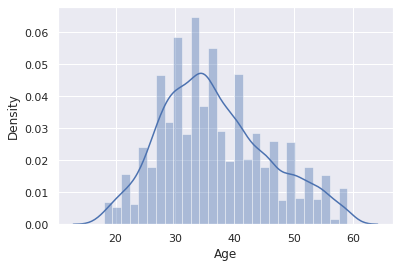

In [454]:
q = data['Age'].quantile(0.932)
data1 = data[data['Age']<q]
data1.describe(include = 'all')
sns.distplot(data1['Age'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



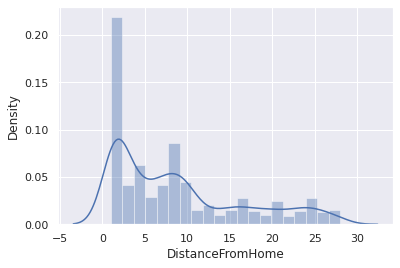

In [455]:
q = data1['DistanceFromHome'].quantile(0.93)
data2 = data1[data1['DistanceFromHome']<q]
data2.describe(include = 'all')
sns.distplot(data2['DistanceFromHome'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



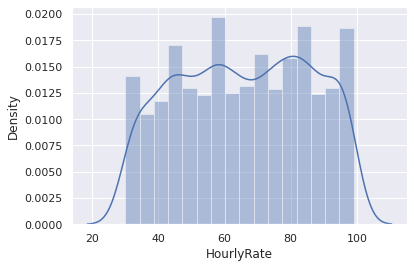

In [456]:
q = data2['HourlyRate'].quantile(0.9999)
data3 = data2[data2['HourlyRate' ]<q]
data3.describe(include = 'all')
sns.distplot(data3['HourlyRate' ])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



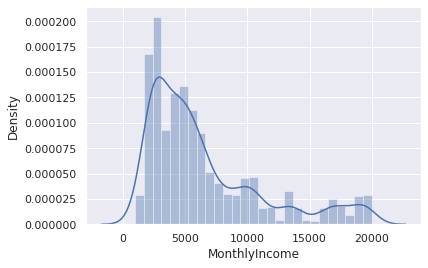

In [457]:
q = data3['MonthlyIncome'].quantile(0.9999)
data4 = data3[data3['MonthlyIncome']<q]
data4.describe(include = 'all')
sns.distplot(data4['MonthlyIncome'])

In [458]:
data4=data4.dropna()


In [459]:
data4

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Attrition
0,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,No
1,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,No
2,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,No
3,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,No
4,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,Yes
4439,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,Yes
4440,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Yes
4441,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Yes


In [460]:
data4.isnull().sum(axis = 0)
data4.reset_index(drop=True)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Attrition
0,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,No
1,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,No
2,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,No
3,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,No
4,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,Yes
3592,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,Yes
3593,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Yes
3594,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Yes


In [461]:
YN_mapping = {"Yes": 1, "No": 0}

In [462]:
data4.iloc[:,-1] = data4.iloc[:,-1].map(YN_mapping)

In [463]:
data4.iloc[:,-1]

0       0
1       0
2       0
3       0
4       0
       ..
4438    1
4439    1
4440    1
4441    1
4442    0
Name: Attrition, Length: 3596, dtype: int64

In [464]:
forscaling = data4.loc[:,['Age','DistanceFromHome', 'HourlyRate', 'MonthlyIncome']]


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



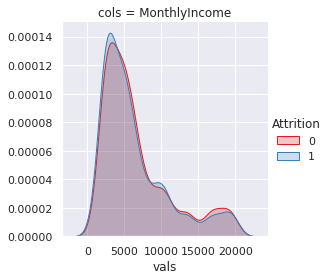

In [465]:
Age_YAC_NCW = data4[[ 'MonthlyIncome','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



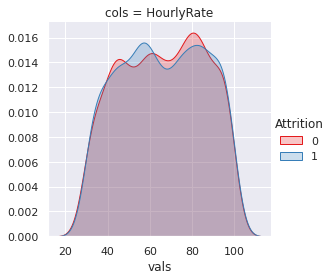

In [466]:
Age_YAC_NCW = data4[[ 'HourlyRate','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



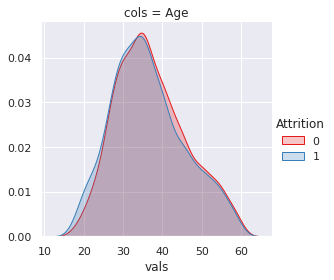

In [467]:
Age_YAC_NCW = data4[['Age','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



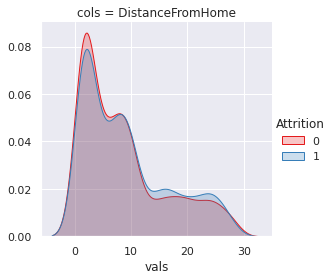

In [468]:
Age_YAC_NCW = data4[['DistanceFromHome','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use 

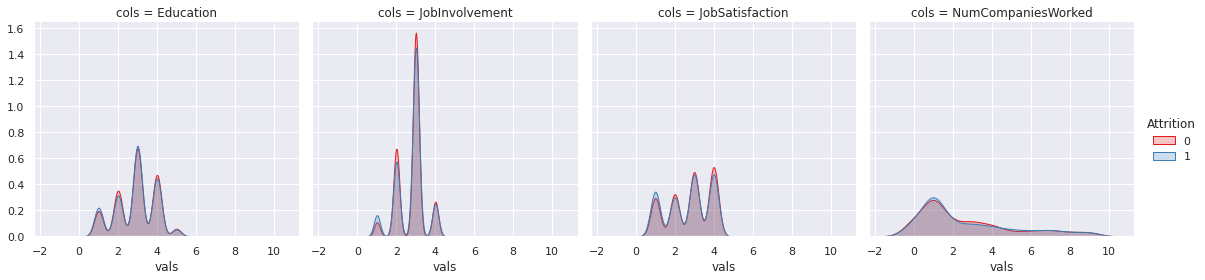

In [470]:
Age_YAC_NCW = data4[[ 'Education', 'JobInvolvement','JobSatisfaction', 'NumCompaniesWorked', 'Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())


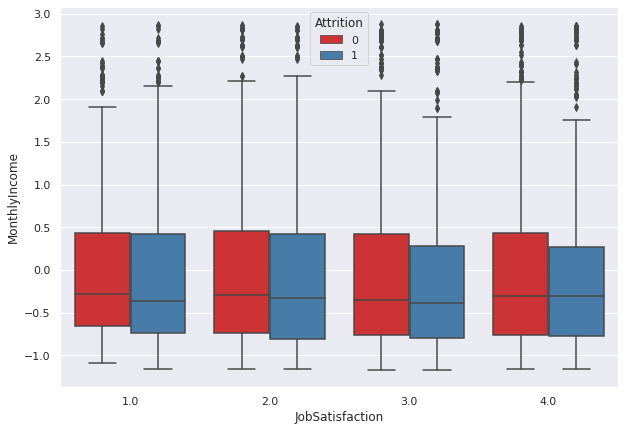

In [471]:
plt.figure(figsize=(10,7))
sns.boxplot(x="JobSatisfaction", y="MonthlyIncome", hue="Attrition",
            data=visualcomparison, palette="Set1")

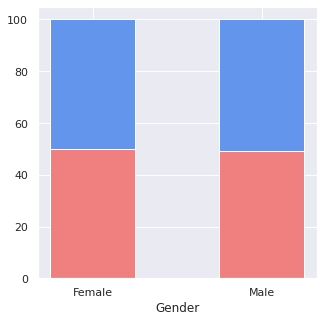

In [472]:
# Data
r = [0,1]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['Gender'] == 'Female')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['Gender'] == 'Female')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['Gender'] == 'Male')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['Gender'] == 'Male')])
raw_data = {'greenBars': [Y_F, Y_M], 'orangeBars': [N_F, N_M]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Female','Male')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Gender")
 
# Show graphic
plt.show()

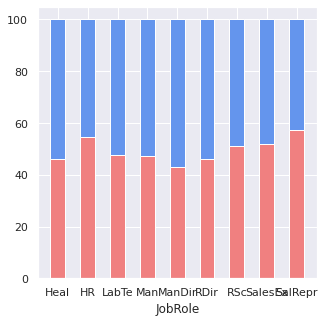

In [473]:
# Data
r = [0,1,2,3,4,5,6,7,8]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Healthcare Representative')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Healthcare Representative')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Human Resources')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Human Resources')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Laboratory Technician')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Laboratory Technician')])
Y_D = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Manager')])
N_D = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Manager')])
Y_E = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Manufacturing Director')])
N_E = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Manufacturing Director')])
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Research Director')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Research Director')])
Y_G = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Research Scientist')])
N_G = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Research Scientist')])
Y_H = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Sales Executive')])
N_H = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Sales Executive')])
Y_I = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Sales Representative')])
N_I = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Sales Representative')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C,Y_D,Y_E,Y_F,Y_G,Y_H,Y_I], 'orangeBars': [N_F, N_M,N_C,N_D,N_E,N_F,N_G,N_H,N_I]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Heal','HR','LabTe','Man','ManDir','RDir', 'RSc', 'SalesEx', 'SalRepr' )
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('JobRole')
 
# Show graphic
plt.show()

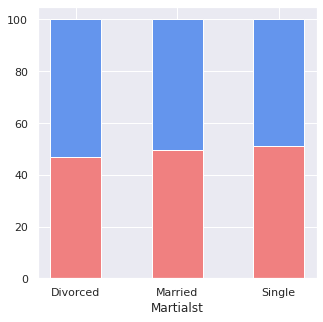

In [474]:
# Data
r = [0,1,2]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['MaritalStatus'] == 'Divorced')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['MaritalStatus'] == 'Divorced')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['MaritalStatus'] == 'Married')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['MaritalStatus'] == 'Married')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['MaritalStatus'] == 'Single')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['MaritalStatus'] == 'Single')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C], 'orangeBars': [N_F, N_M,N_C]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Divorced','Married','Single')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('Martialst')
 
# Show graphic
plt.show()

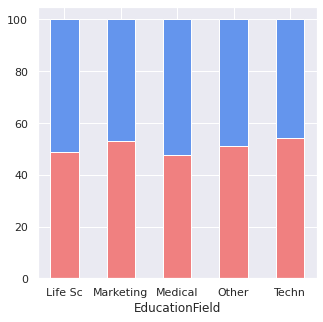

In [475]:
# Data
r = [0,1,2,3,4]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Life Sciences')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Life Sciences')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Marketing')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Marketing')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Medical')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Medical')])
Y_D = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Other')])
N_D = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Other')])
Y_E = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Technical Degree')])
N_E = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Technical Degree')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C,Y_D,Y_E], 'orangeBars': [N_F, N_M,N_C,N_D,N_E]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Life Sc','Marketing','Medical','Other','Techn' )
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('EducationField')
 
# Show graphic
plt.show()

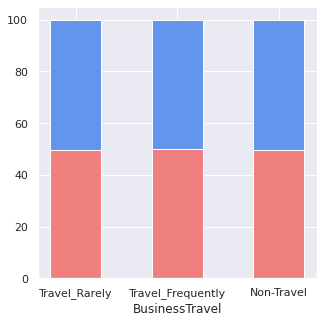

In [476]:
# Data
r = [0,1,2]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['BusinessTravel'] == 'Travel_Rarely')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['BusinessTravel'] == 'Travel_Rarely')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['BusinessTravel'] == 'Travel_Frequently')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['BusinessTravel'] == 'Travel_Frequently')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['BusinessTravel'] == 'Non-Travel')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['BusinessTravel'] == 'Non-Travel')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C], 'orangeBars': [N_F, N_M,N_C]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Travel_Rarely','Travel_Frequently','Non-Travel')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('BusinessTravel')
 
# Show graphic
plt.show()

In [477]:
nonscaled = data4.loc[:,[ 'Education', 'EducationField', 'JobInvolvement',  'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked']]
#gender wywalony po comparison, to samo business travel


In [478]:
y = data4.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
4438    1
4439    1
4440    1
4441    1
4442    0
Name: Attrition, Length: 3596, dtype: int64

In [577]:
scaler = StandardScaler()
scaler.fit(forscaling)
x = scaler.transform(forscaling)
x1= data4.loc[:,['Age','DistanceFromHome', 'HourlyRate', 'MonthlyIncome','Education', 'EducationField', 'JobInvolvement',  'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked']]

In [480]:
x

array([[-0.73747122, -1.02173381, -0.54477751, -0.29130014],
       [ 0.13964024, -0.89093442, -0.59504488,  0.27017978],
       [-1.17602695, -0.36773688, -0.99718383, -0.88010684],
       ...,
       [ 0.57819597, -0.36773688,  0.86270883,  1.46401845],
       [ 0.57819597, -0.36773688,  0.86270883,  1.46401845],
       [ 0.57819597, -0.36773688,  0.86270883,  1.46401845]])

In [481]:
x2 = pd.DataFrame(data=x)
x2 = x2.rename(columns={0: 'Age', 1: 'DistanceFromHome', 2: 'HourlyRate', 3:'MonthlyIncome'})
x2

,Age,DistanceFromHome,HourlyRate,MonthlyIncome
0,-0.737471,-1.021734,-0.544778,-0.291300
1,0.139640,-0.890934,-0.595045,0.270180
2,-1.176027,-0.367737,-0.997184,-0.880107
3,-0.956749,-0.106138,0.008164,-0.678999
4,-0.189277,-0.629336,0.460570,-0.969132
...,...,...,...,...
3591,0.468557,2.509850,-0.293441,1.511413
3592,0.468557,2.509850,-0.293441,1.511413
3593,0.578196,-0.367737,0.862709,1.464018
3594,0.578196,-0.367737,0.862709,1.464018


In [482]:
nonscaled

,Education,EducationField,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked
0,1.0,Life Sciences,2.0,Laboratory Technician,4.0,Married,1.0
1,2.0,Medical,2.0,Manufacturing Director,3.0,Married,3.0
2,3.0,Other,2.0,Research Scientist,2.0,Married,1.0
3,2.0,Life Sciences,3.0,Research Scientist,4.0,Single,1.0
4,2.0,Other,3.0,Laboratory Technician,4.0,Divorced,1.0
...,...,...,...,...,...,...,...
4438,4.0,Life Sciences,2.0,Manufacturing Director,2.0,Married,0.0
4439,4.0,Life Sciences,2.0,Manufacturing Director,2.0,Married,0.0
4440,3.0,Medical,3.0,Research Director,1.0,Married,9.0
4441,3.0,Medical,3.0,Research Director,1.0,Married,9.0


In [483]:
# datascaled = pd.concat([x2, nonscaled], axis=1, ignore_index=True)
datascaled = pd.concat([x2.reset_index(drop=True), nonscaled.reset_index(drop=True)], axis=1)

In [484]:

datascaled

,Age,DistanceFromHome,HourlyRate,MonthlyIncome,Education,EducationField,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked
0,-0.737471,-1.021734,-0.544778,-0.291300,1.0,Life Sciences,2.0,Laboratory Technician,4.0,Married,1.0
1,0.139640,-0.890934,-0.595045,0.270180,2.0,Medical,2.0,Manufacturing Director,3.0,Married,3.0
2,-1.176027,-0.367737,-0.997184,-0.880107,3.0,Other,2.0,Research Scientist,2.0,Married,1.0
3,-0.956749,-0.106138,0.008164,-0.678999,2.0,Life Sciences,3.0,Research Scientist,4.0,Single,1.0
4,-0.189277,-0.629336,0.460570,-0.969132,2.0,Other,3.0,Laboratory Technician,4.0,Divorced,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3591,0.468557,2.509850,-0.293441,1.511413,4.0,Life Sciences,2.0,Manufacturing Director,2.0,Married,0.0
3592,0.468557,2.509850,-0.293441,1.511413,4.0,Life Sciences,2.0,Manufacturing Director,2.0,Married,0.0
3593,0.578196,-0.367737,0.862709,1.464018,3.0,Medical,3.0,Research Director,1.0,Married,9.0
3594,0.578196,-0.367737,0.862709,1.464018,3.0,Medical,3.0,Research Director,1.0,Married,9.0


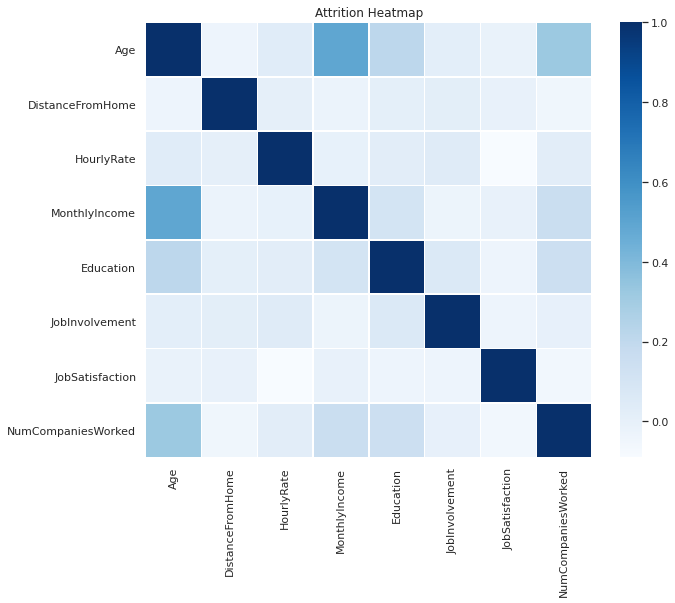

In [485]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = datascaled.corr()
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [579]:
datascaled = pd.get_dummies (datascaled)
x1=pd.get_dummies(x1)

In [487]:
datascaled


,Age,DistanceFromHome,HourlyRate,MonthlyIncome,Education,JobInvolvement,JobSatisfaction,NumCompaniesWorked,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-0.737471,-1.021734,-0.544778,-0.291300,1.0,2.0,4.0,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0.139640,-0.890934,-0.595045,0.270180,2.0,2.0,3.0,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,-1.176027,-0.367737,-0.997184,-0.880107,3.0,2.0,2.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,-0.956749,-0.106138,0.008164,-0.678999,2.0,3.0,4.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,-0.189277,-0.629336,0.460570,-0.969132,2.0,3.0,4.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,0.468557,2.509850,-0.293441,1.511413,4.0,2.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3592,0.468557,2.509850,-0.293441,1.511413,4.0,2.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3593,0.578196,-0.367737,0.862709,1.464018,3.0,3.0,1.0,9.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3594,0.578196,-0.367737,0.862709,1.464018,3.0,3.0,1.0,9.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


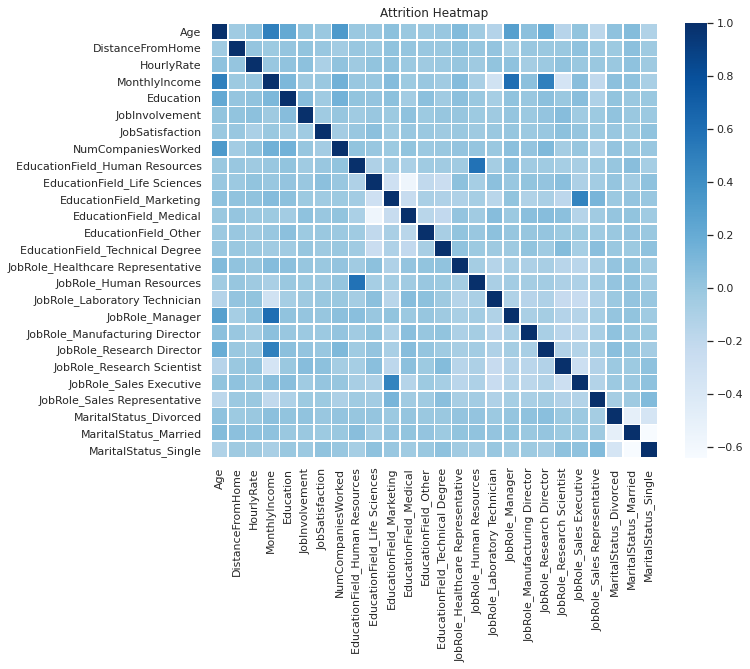

In [488]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = datascaled.corr()
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [489]:
data4.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,Attrition
count,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000
mean,36.726363,8.811457,2.897664,2.736374,65.837597,2.747497,2.063960,2.724972,6490.464405,2.678254,0.495551
std,9.122116,7.646359,1.024639,1.091130,19.896388,0.707741,1.100675,1.102406,4684.701397,2.503446,0.500050
min,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2909.000000,1.000000,0.000000
50%,36.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,0.000000
75%,42.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8381.000000,4.000000,1.000000
max,59.000000,28.000000,5.000000,4.000000,99.000000,4.000000,5.000000,4.000000,19973.000000,9.000000,1.000000


In [490]:
cleaneddata=datascaled

In [491]:
x = datascaled

In [492]:
visualcomparison = pd.concat([x.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



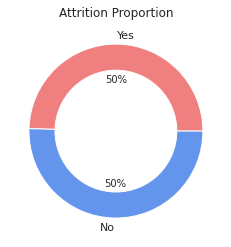

In [493]:
Y_count = len(visualcomparison[visualcomparison['Attrition'] == 1])
N_count = len(visualcomparison[visualcomparison['Attrition'] == 0])
# create data
names='Yes', 'No',
size=[Y_count,N_count]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['lightcoral','cornflowerblue'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show()

In [494]:
visualcomparison

,Age,DistanceFromHome,HourlyRate,MonthlyIncome,Education,JobInvolvement,JobSatisfaction,NumCompaniesWorked,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,-0.737471,-1.021734,-0.544778,-0.291300,1.0,2.0,4.0,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.139640,-0.890934,-0.595045,0.270180,2.0,2.0,3.0,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,-1.176027,-0.367737,-0.997184,-0.880107,3.0,2.0,2.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,-0.956749,-0.106138,0.008164,-0.678999,2.0,3.0,4.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,-0.189277,-0.629336,0.460570,-0.969132,2.0,3.0,4.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,0.468557,2.509850,-0.293441,1.511413,4.0,2.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3592,0.468557,2.509850,-0.293441,1.511413,4.0,2.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3593,0.578196,-0.367737,0.862709,1.464018,3.0,3.0,1.0,9.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
3594,0.578196,-0.367737,0.862709,1.464018,3.0,3.0,1.0,9.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [536]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=42)

In [537]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(x, y):
  X_train_kfold, y_train_kfold = x.iloc[train], y.iloc[train]
  X_test_kfold, y_test_kfold = x.iloc[test], y.iloc[test]

SVC
              precision    recall  f1-score   support

           0       0.51      0.67      0.58       363
           1       0.50      0.34      0.40       357

    accuracy                           0.51       720
   macro avg       0.51      0.51      0.49       720
weighted avg       0.51      0.51      0.49       720



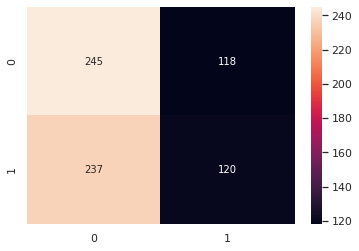

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       363
           1       0.49      0.51      0.50       357

    accuracy                           0.49       720
   macro avg       0.49      0.49      0.49       720
weighted avg       0.49      0.49      0.49       720



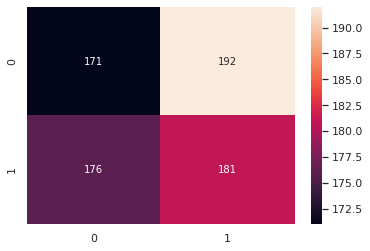

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.45      0.52      0.48       363
           1       0.42      0.36      0.39       357

    accuracy                           0.44       720
   macro avg       0.44      0.44      0.44       720
weighted avg       0.44      0.44      0.44       720



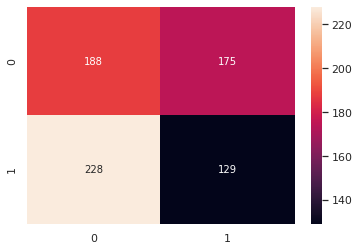

In [538]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
classifiers = [SVC, KNeighborsClassifier, DecisionTreeClassifier]
for classifier_class in classifiers:
    model = classifier_class()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

SVC
              precision    recall  f1-score   support

           0       0.49      0.57      0.52       362
           1       0.48      0.40      0.44       357

    accuracy                           0.48       719
   macro avg       0.48      0.48      0.48       719
weighted avg       0.48      0.48      0.48       719



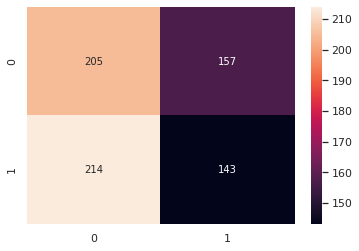

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       362
           1       0.46      0.43      0.45       357

    accuracy                           0.46       719
   macro avg       0.46      0.46      0.46       719
weighted avg       0.46      0.46      0.46       719



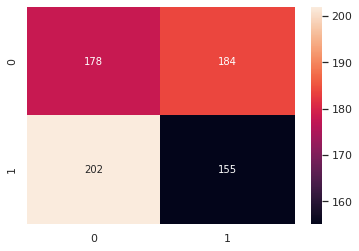

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.46      0.53      0.49       362
           1       0.44      0.37      0.40       357

    accuracy                           0.45       719
   macro avg       0.45      0.45      0.45       719
weighted avg       0.45      0.45      0.45       719



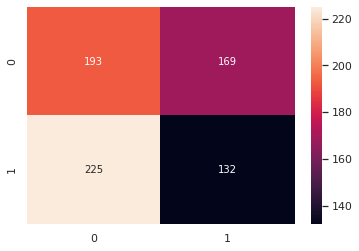

In [498]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
classifiers = [SVC, KNeighborsClassifier, DecisionTreeClassifier]
for classifier_class in classifiers:
    model = classifier_class()
    model.fit(X_train_kfold, y_train_kfold)
    y_pred_kfold = model.predict(X_test_kfold)
    print(model.__class__.__name__)
    print(classification_report(y_test_kfold, y_pred_kfold))
    cm = confusion_matrix(y_test_kfold, y_pred_kfold)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

KNN


In [499]:
from sklearn.neighbors import KNeighborsClassifier
# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Predict on the test features, print the results
pred = knn.predict(X_test)

In [500]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy
def calculate_metrics(target, prediction, average='micro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total
def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [501]:
print_results(calculate_metrics(y_test, pred), 'kNN')

Results for kNN
----
  Accuracy:  0.4875
  Precision: 0.4875
  Recall:    0.4875
  F1 score:  0.4875
  Mislabeled 369 out of 720




In [502]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.49      0.52      0.50       363
           1       0.48      0.46      0.47       357

    accuracy                           0.49       720
   macro avg       0.49      0.49      0.49       720
weighted avg       0.49      0.49      0.49       720



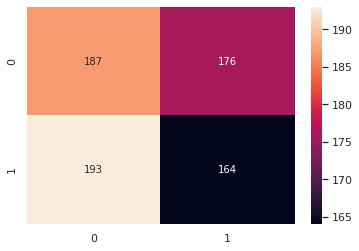

In [503]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred))

In [504]:
from sklearn.model_selection import GridSearchCV

In [505]:
params_knn = {
    'n_neighbors': [2, 3, 5, 7, 10, 15],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}
clf  = GridSearchCV(KNeighborsClassifier(), params_knn)
clf.fit(X_train_kfold, y_train_kfold)
clf.best_params_

{'algorithm': 'auto', 'metric': 'chebyshev', 'n_neighbors': 10}

In [539]:
knn = KNeighborsClassifier(algorithm= 'auto', metric= 'chebyshev', n_neighbors= 10)

In [540]:
knn.fit(X_train_kfold, y_train_kfold)
y_pred_kfold = knn.predict(X_test_kfold)

In [541]:
print_results(calculate_metrics(y_test_kfold, y_pred_kfold), 'kNN for KFold')

Results for kNN for KFold
----
  Accuracy:  0.4659248956884562
  Precision: 0.4659248956884562
  Recall:    0.4659248956884562
  F1 score:  0.4659248956884562
  Mislabeled 384 out of 719




In [542]:
# y_pred = knn.predict()
# y_pred.to_csv(index=False)

In [543]:
# y_pred_kfold_csv = pd.DataFrame(data=y_pred_kfold)
# y_pred_kfold_csv('y_pred.csv', index = False)
# from google.colab import files
# files.download('y_pred.csv')

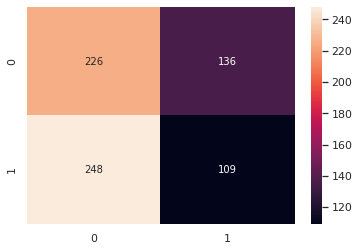

In [544]:
cm = confusion_matrix(y_test_kfold, y_pred_kfold)
sns.heatmap(cm, annot=True, fmt='d')

SVC

In [549]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

params_grid = {
    'C': [0.01, 0.1, 1, 10, 100,],
    'kernel': ["linear", "rbf"],
    'class_weight': [None, "balanced"]
}

clf = GridSearchCV(SVC(), params_grid, scoring="recall")
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [552]:
model = SVC(C=1, class_weight=None, kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [553]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.67      0.58       363
           1       0.50      0.34      0.40       357

    accuracy                           0.51       720
   macro avg       0.51      0.51      0.49       720
weighted avg       0.51      0.51      0.49       720



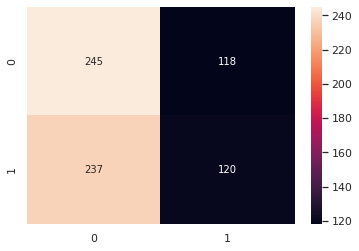

In [554]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [555]:
model.fit(X_train_kfold, y_train_kfold)
y_pred = model.predict(X_test_kfold)

In [557]:
print(classification_report(y_test_kfold, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.57      0.52       362
           1       0.48      0.40      0.44       357

    accuracy                           0.48       719
   macro avg       0.48      0.48      0.48       719
weighted avg       0.48      0.48      0.48       719



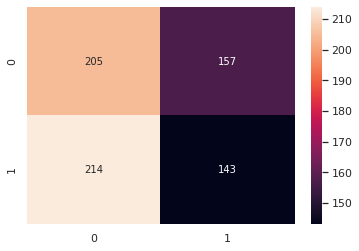

In [558]:
cm = confusion_matrix(y_test_kfold, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [560]:
vm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(vm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.001}
Best CV accuracy 0.5236527777777777
Test accuracy of best grid search hypers: 0.5097222222222222


drzewo

In [518]:
from sklearn.tree import plot_tree

In [519]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [520]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [521]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

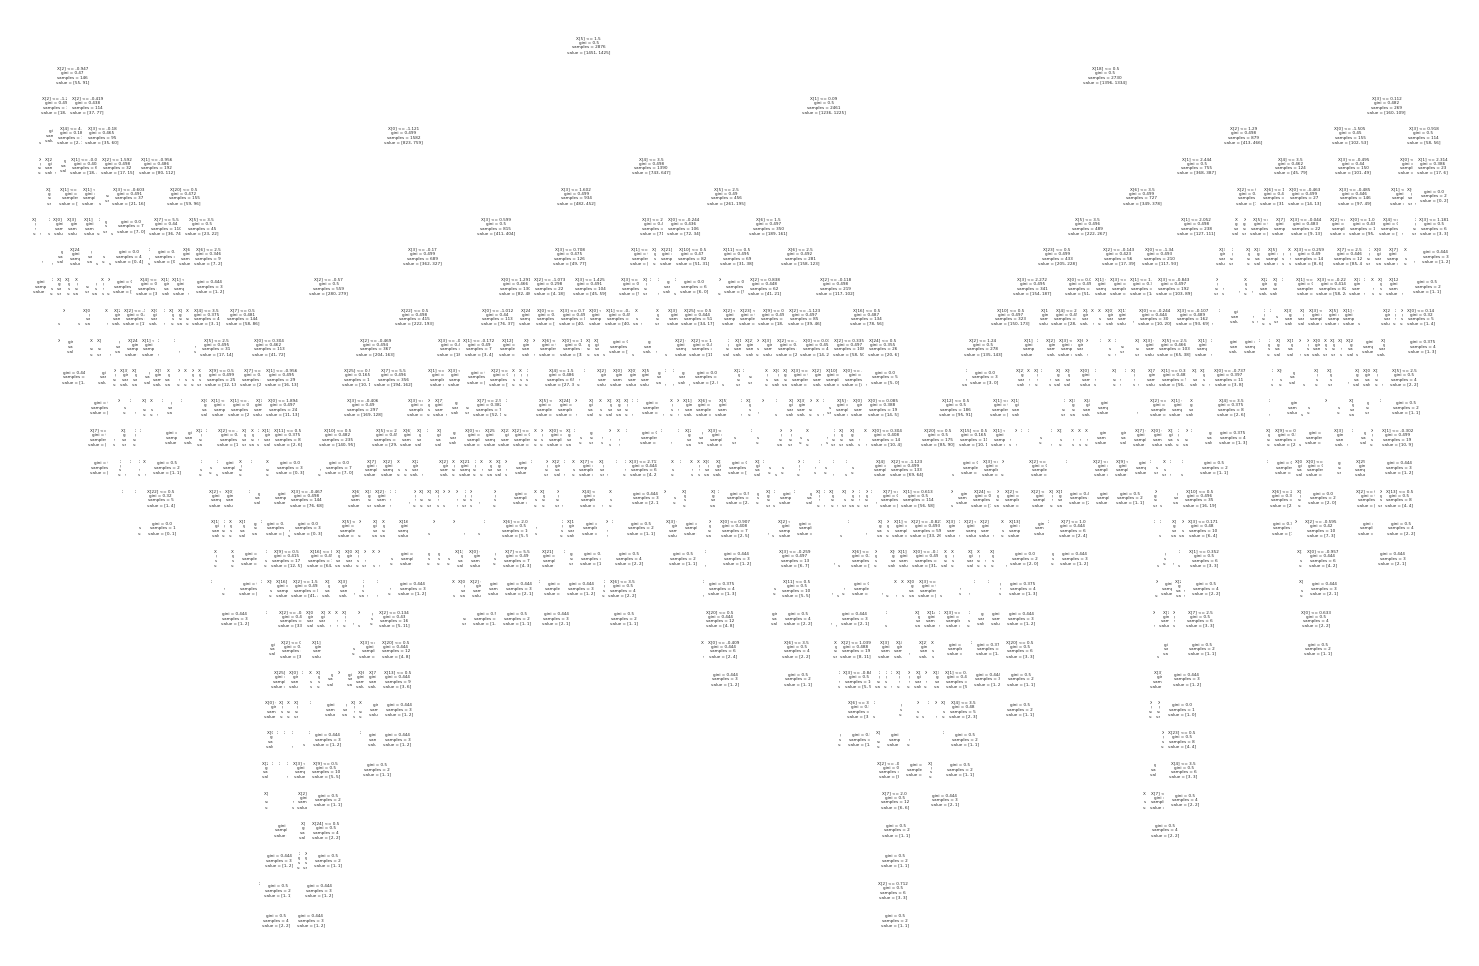

In [522]:
plt.figure(dpi=300)
plot_tree(clf)
plt.show()

Results for Decision Tree train
----
  Accuracy:  0.7521724018074383
  Precision: 0.7521724018074383
  Recall:    0.7521724018074383
  F1 score:  0.7521724018074383
  Mislabeled 713 out of 2877




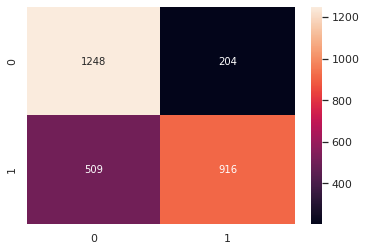

In [523]:
clf = DecisionTreeClassifier()
clf.fit(X_train_kfold, y_train_kfold)
y_dt_train =  clf.predict(X_train_kfold)
print_results(calculate_metrics(y_train_kfold.values, y_dt_train), 'Decision Tree train')
cm = confusion_matrix(y_train_kfold, y_dt_train)
sns.heatmap(cm, annot=True, fmt='d')


Results for Decision Tree train
----
  Accuracy:  0.4506258692628651
  Precision: 0.4506258692628651
  Recall:    0.4506258692628651
  F1 score:  0.4506258692628651
  Mislabeled 395 out of 719




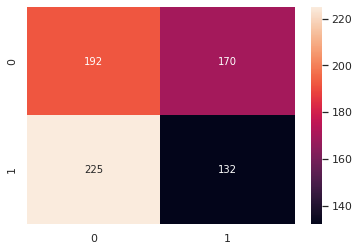

In [524]:
y_dt = clf.predict(X_test_kfold)
print_results(calculate_metrics(y_test_kfold.values, y_dt), 'Decision Tree train')
cm = confusion_matrix(y_test_kfold, y_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [525]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_dt = clf.predict(X_test)

Results for Decision Tree train
----
  Accuracy:  0.7506954102920723
  Precision: 0.7506954102920723
  Recall:    0.7506954102920723
  F1 score:  0.7506954102920722
  Mislabeled 717 out of 2876




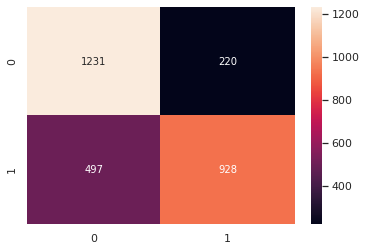

In [526]:
y_dt_train =  clf.predict(X_train)
print_results(calculate_metrics(y_train.values, y_dt_train), 'Decision Tree train')
cm = confusion_matrix(y_train, y_dt_train)
sns.heatmap(cm, annot=True, fmt='d')


Results for Decision Tree train
----
  Accuracy:  0.44722222222222224
  Precision: 0.44722222222222224
  Recall:    0.44722222222222224
  F1 score:  0.4472222222222222
  Mislabeled 398 out of 720




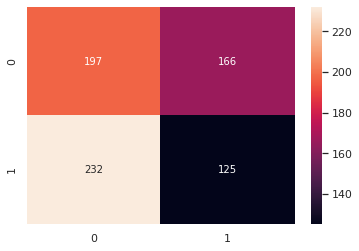

In [527]:
y_dt = clf.predict(X_test)
print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree train')
cm = confusion_matrix(y_test, y_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [528]:
def plot_confusion_matrix(confusion_matrix, classes, title=None,
                          title_appendix='',
                          cmap=plt.cm.Blues):
    # tytuł wykresu
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    fig, ax = plt.subplots()
    # rysuje CM
    img = ax.imshow(confusion_matrix, cmap=cmap)
    # dodaje pasek z boku
    ax.figure.colorbar(img, ax=ax)
    # dodatki do wykresu
    ax.set_xticks(np.arange(confusion_matrix.shape[1]))
    ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_yticks(np.arange(confusion_matrix.shape[0]))
    ax.set_yticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    # etykiety
    fmt = '.2f' if confusion_matrix.dtype == 'float' else 'd'
    thresh = confusion_matrix.max() / 2
    for y, row in enumerate(confusion_matrix):
        for x, cell in enumerate(row):
            ax.text(x, y, format(cell, fmt),
                    ha='center', va='center',
                    color='white' if cell > thresh else 'black')
    fig.tight_layout()
    return ax

In [529]:
#print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree test')
#cm = confusion_matrix(y_test, y_dt)
#plot_confusion_matrix(cm, y)

In [530]:
#classes = cleaneddata.pop(y).unique()

Results for Decision Tree test
----
  Accuracy:  0.44722222222222224
  Precision: 0.44722222222222224
  Recall:    0.44722222222222224
  F1 score:  0.4472222222222222
  Mislabeled 398 out of 720




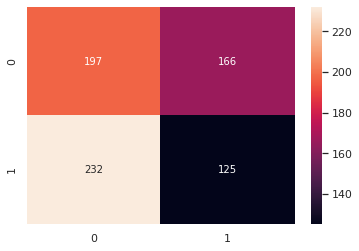

In [531]:
print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree test')
cm = confusion_matrix(y_test, y_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [532]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

46.11


In [533]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.46      0.46       363
           1       0.46      0.46      0.46       357

    accuracy                           0.46       720
   macro avg       0.46      0.46      0.46       720
weighted avg       0.46      0.46      0.46       720



In [534]:
print(X_train)

           Age  DistanceFromHome  ...  MaritalStatus_Married  MaritalStatus_Single
2551  1.674585         -0.890934  ...                      0                     1
1612 -0.408554          1.594254  ...                      1                     0
31   -1.176027         -1.021734  ...                      1                     0
1048 -0.189277         -1.021734  ...                      1                     0
2936 -0.737471         -0.890934  ...                      1                     0
...        ...               ...  ...                    ...                   ...
297  -0.847110          1.463455  ...                      1                     0
1570  1.784224         -0.890934  ...                      1                     0
406  -1.724222          0.809458  ...                      0                     1
846  -0.189277         -0.890934  ...                      0                     0
1384  1.016752         -0.498536  ...                      0                     0

[28

random forest

In [562]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.45      0.46       363
           1       0.47      0.49      0.48       357

    accuracy                           0.47       720
   macro avg       0.47      0.47      0.47       720
weighted avg       0.47      0.47      0.47       720



In [563]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [564]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [568]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.69      0.58       363
           1       0.48      0.30      0.37       357

    accuracy                           0.49       720
   macro avg       0.49      0.49      0.47       720
weighted avg       0.49      0.49      0.47       720



In [571]:
gnb = GaussianNB()  # inny klasyfikator
gnb.fit(X_train, y_train)
y_gnb = gnb.predict(X_test)
print(y_test.values)
print(y_gnb)
print(confusion_matrix(y_test,y_gnb))

[1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0
 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1
 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1
 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 

In [572]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [573]:
print_results(calculate_metrics(y_test.values, y_gnb), 'GNB')

Results for GNB
----
  Accuracy:  0.49444444444444446
  Precision: 0.4915804459597929
  Recall:    0.4928351505891613
  F1 score:  0.47398421631515986
  Mislabeled 364 out of 720




In [575]:
x

,Age,DistanceFromHome,HourlyRate,MonthlyIncome,Education,JobInvolvement,JobSatisfaction,NumCompaniesWorked,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-0.737471,-1.021734,-0.544778,-0.291300,1.0,2.0,4.0,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0.139640,-0.890934,-0.595045,0.270180,2.0,2.0,3.0,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,-1.176027,-0.367737,-0.997184,-0.880107,3.0,2.0,2.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,-0.956749,-0.106138,0.008164,-0.678999,2.0,3.0,4.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,-0.189277,-0.629336,0.460570,-0.969132,2.0,3.0,4.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,0.468557,2.509850,-0.293441,1.511413,4.0,2.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3592,0.468557,2.509850,-0.293441,1.511413,4.0,2.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3593,0.578196,-0.367737,0.862709,1.464018,3.0,3.0,1.0,9.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3594,0.578196,-0.367737,0.862709,1.464018,3.0,3.0,1.0,9.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [599]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))

0.5342123246352414


In [601]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)



AttributeError: ignored

In [602]:
gspred = gs.predict(X_test)
print(mean_absolute_error(y_test, gspred))

0.5208333333333334


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

In [ ]:
# pd.concat((pd.DataFrame(X_train.columns, columns = ['variable']), 
#            pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
#           axis = 1).sort_values(by='importance', ascending = False)[:20]

In [ ]:
# predictions = rf.predict(test)
# predictions = pd.DataFrame(predictions, columns=['Survived'])
# test = pd.read_csv(os.path.join('../input', 'test.csv'))
# predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
# predictions.to_csv('y_test15.csv', sep=",", index = False)